# Explore data
In this notebook, we will visualize the distribution of values for each columns
## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Read data from file

In [3]:
ds_survey_df = pd.read_csv('../Dataset/final_data.csv', low_memory=False)
ds_survey_df.head()

,Duration (in seconds),Age,Gender,Residential country,Student?,DS Platform (Coursera),DS Platform (edX),DS Platform (Kaggle Learn Courses),DS Platform (DataCamp),DS Platform (Fast.ai),...,Favorite media sources (Reddit),Favorite media sources (Kaggle),Favorite media sources (Course Forums),Favorite media sources (YouTube),Favorite media sources (Podcasts),Favorite media sources (Blogs),Favorite media sources (Journal Publications),Favorite media sources (Slack),Favorite media sources (None),Favorite media sources (Other)
0,121.0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462.0,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293.0,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851.0,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232.0,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN



## **One choice columns**
##### - **Age of participants:**


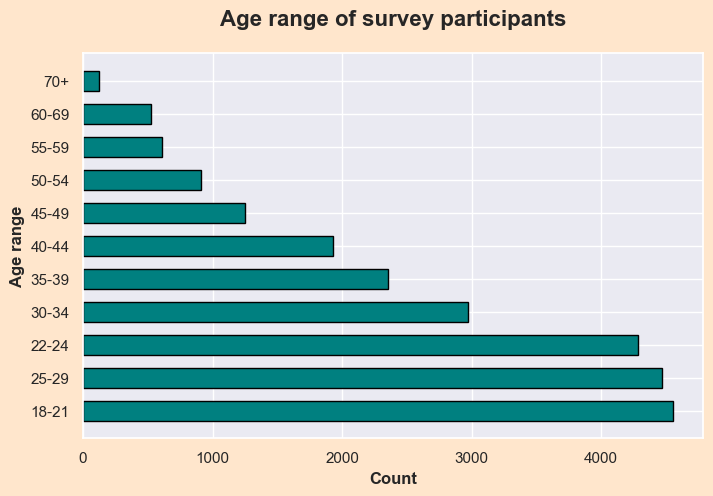

In [127]:

age_df = ds_survey_df['Age']
age_counts = age_df.value_counts()

# Sort values by frequency in descending order
sorted_age_counts = age_counts.sort_values(ascending=False)

sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(sorted_age_counts.keys(), sorted_age_counts, edgecolor = 'black', color = '#008080', height = 0.6)

plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Age range', fontweight = 'bold')
plt.title('Age range of survey participants', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

- From the plot, we can observe that the majority of survey participants' age is in the range of approximately 18 to 39 years old.
- There also a group of participants who are above 70 years old

##### - **Gender of participants:**

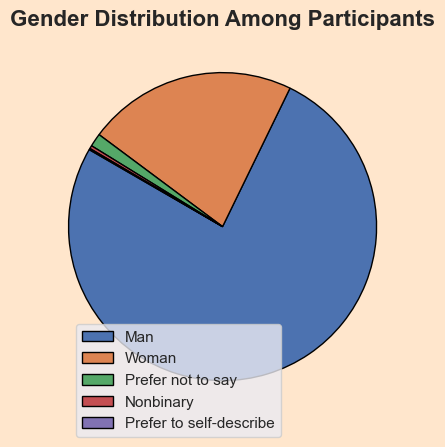

In [5]:
gender_df = ds_survey_df['Gender']
gender_count = gender_df.value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.pie(gender_count ,startangle = 150,  wedgeprops={'edgecolor': 'black','linewidth': 1})
plt.legend(labels = gender_count.keys(), loc='center left', bbox_to_anchor=(0.1, 0.1), )
plt.title('Gender Distribution Among Participants', fontsize = '16', fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

Based on the plot, the majority of survey participants (approximately 75 percent), is men. Women just get 22 percent of the total participants. This lead to a gender imbalance in the survey sample.

##### - **Current residential countries of participants:**

In [46]:
countries_df = ds_survey_df['Residential country']
countries_count = countries_df.value_counts().reset_index()

title = "Survey participants around the World"

fig = px.choropleth(countries_count, 
                    locations='Residential country', 
                    locationmode='country names',
                    color='count',
                    hover_name='Residential country',
                    title= title,
                    color_continuous_scale= "Viridis_r" 
                    )

fig.update_layout(
            title_font_size = 30,
                 width = 800,
                 height = 450,
                 margin=dict(l=20, r=20, t=70, b=0),
                paper_bgcolor='#ffe6cc'
                 )

fig.show(config=dict({'scrollZoom':False}))

Most paticipants of this survey are from India and the USA

##### - **Education status of participants ( currently be a student or not):**

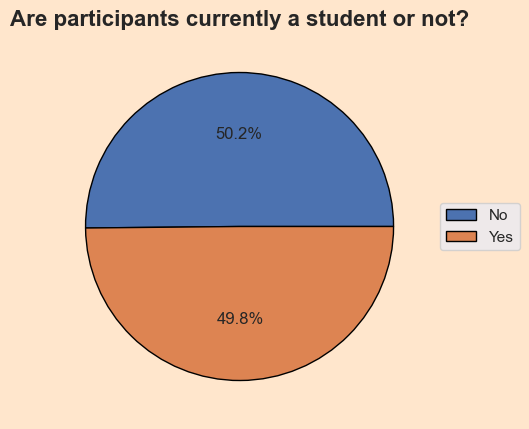

In [7]:
education_df = ds_survey_df['Student?']
education_count = education_df.value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.pie(education_count, autopct="%1.1f%%", wedgeprops={'edgecolor': 'black','linewidth': 1})
plt.legend(labels = education_count.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Are participants currently a student or not?', fontsize = '16', fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

There is a equal percentage of participants who are currently students with those are not. We can get more insights from this observation in further analysis.

##### - **Highest level of education in the next 2 years:**


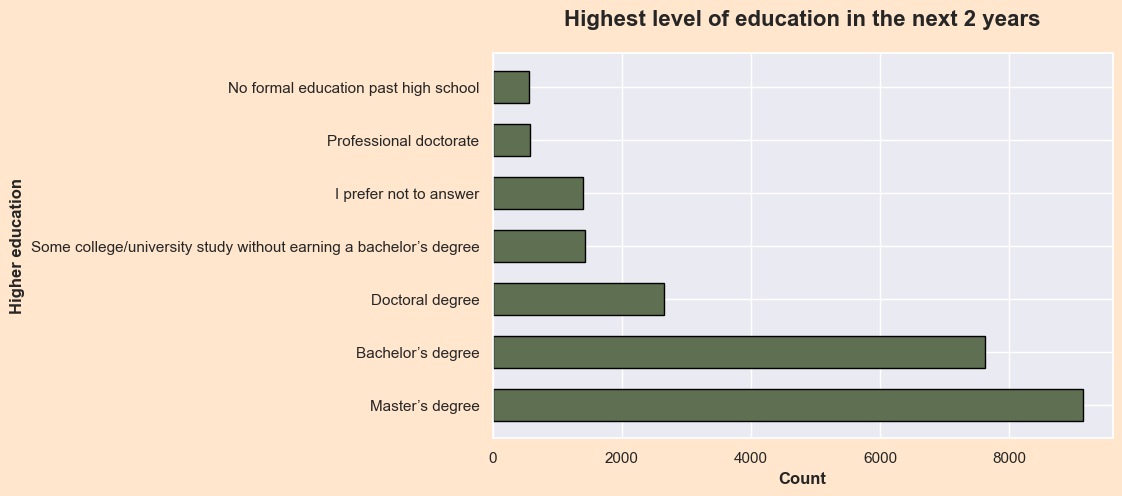

In [50]:
higher_edu_df = ds_survey_df['Higher education?']
higher_edu_count = higher_edu_df.value_counts()

higher_edu_count.sort_values(ascending = False,inplace= True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(higher_edu_count.keys(), higher_edu_count, edgecolor = 'black', color = '#5F6F52', height = 0.6)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Higher education', fontweight = 'bold')
plt.title('Highest level of education in the next 2 years', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

In the next 2 years, most of participant make an intention to pursue a Master's degree or a Bachelor'degree.

##### - **Academic research publication?**

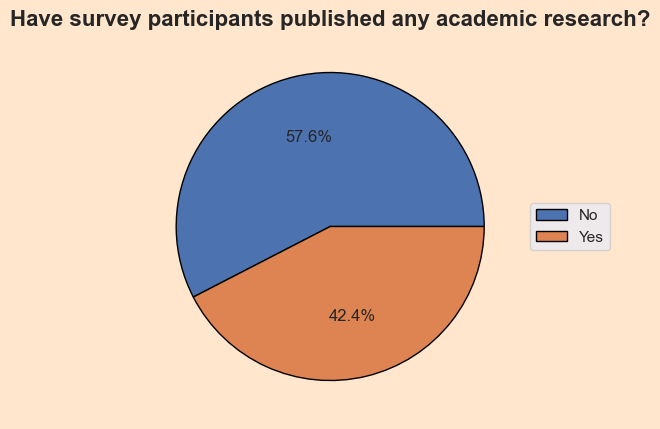

In [123]:
academic_research = ds_survey_df['Academic research publication?']

academic_research_count = academic_research.value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.pie(academic_research_count,  autopct="%1.1f%%", wedgeprops={'edgecolor': 'black','linewidth': 1})
plt.legend(labels = academic_research_count.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Have survey participants published any academic research?', fontsize = '16', fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

Over 50 percent of survey participants reported that they haven't published any academic reseaches. This result can be explained by the fact that half of participants are students.

##### - **Programming experience (in year) of participants:**

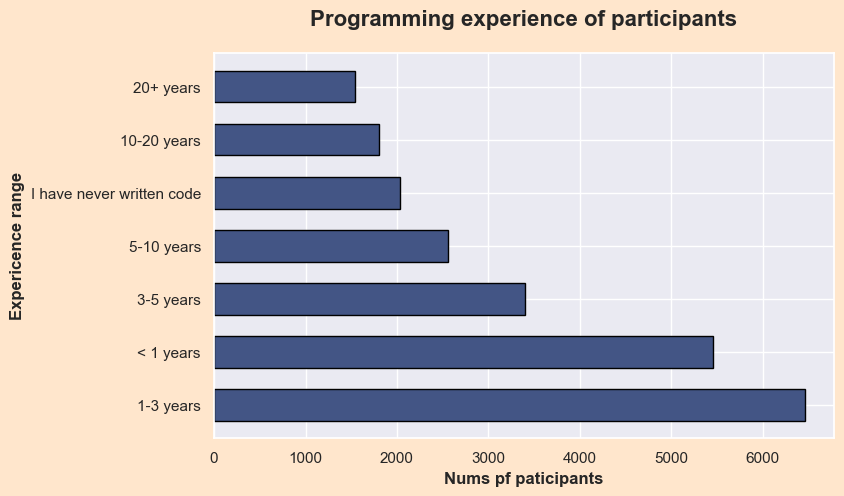

In [51]:
exp_year_df = ds_survey_df['Programming experience']
count_exp_year_df = exp_year_df.value_counts()
count_exp_year_df.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_exp_year_df.keys(), count_exp_year_df, edgecolor = 'black', color = '#435585', height = 0.6)
plt.xlabel('Num of paticipants', fontweight = 'bold')
plt.ylabel('Expericence range', fontweight = 'bold')
plt.title('Programming experience of participants', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

- Most of survey participants have the programming experience in range of 1 to 3 years.      
- Over 2000 of participants that haven never written code before.

##### - **Machine learning experience (in year):**

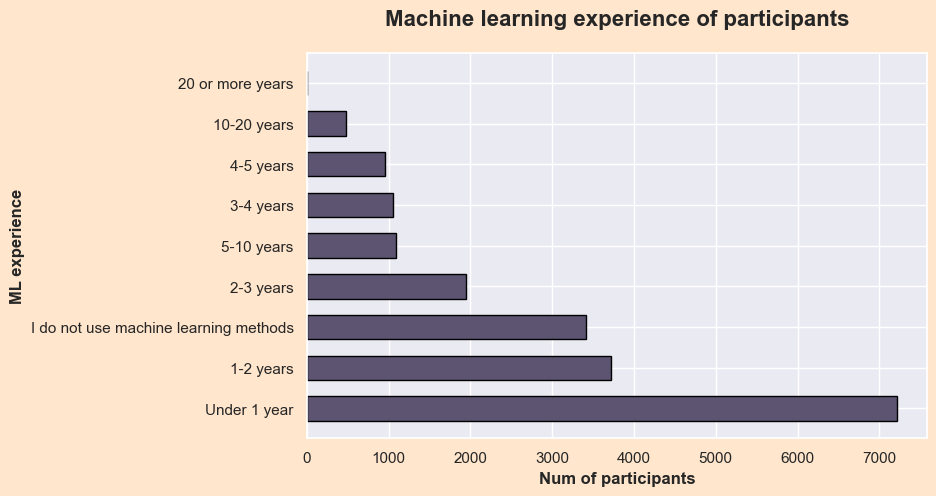

In [124]:
ml_exp_df = ds_survey_df['ML experience']
count_ml_exp_df = ml_exp_df.value_counts()
count_ml_exp_df.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_ml_exp_df.keys(), count_ml_exp_df, edgecolor = 'black', color = '#5C5470', height = 0.6)
plt.xlabel('Num of participants', fontweight = 'bold')
plt.ylabel('ML experience', fontweight = 'bold')
plt.title('Machine learning experience of participants', fontsize = '16', fontweight = 'bold', pad = '20')


fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

In machine learning experience, most of participants have limited experience in Machine Learning. This also can be explained by the ratio of student paticipate in this survey.

##### **Most used ML hub/repository:**

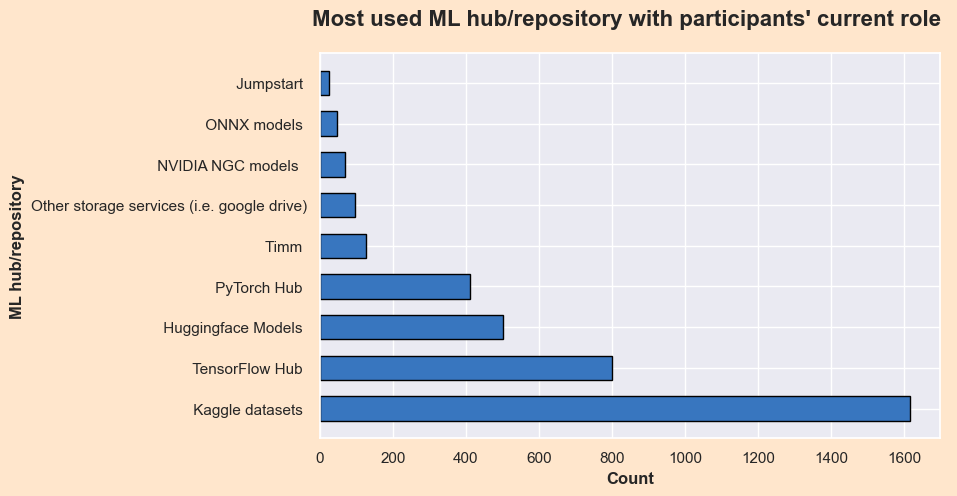

In [52]:
ML_hub_df = ds_survey_df['Most used ML hub/repository']
count_ML_hub = ML_hub_df.value_counts()
count_ML_hub.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_ML_hub.keys(), count_ML_hub, edgecolor = 'black', color = '#3876BF', height = 0.6)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('ML hub/repository', fontweight = 'bold')
plt.title('Most used ML hub/repository with participants\' current role ', fontsize = '16', fontweight = 'bold', pad = '20')


fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()


##### - **Current role of participants:**

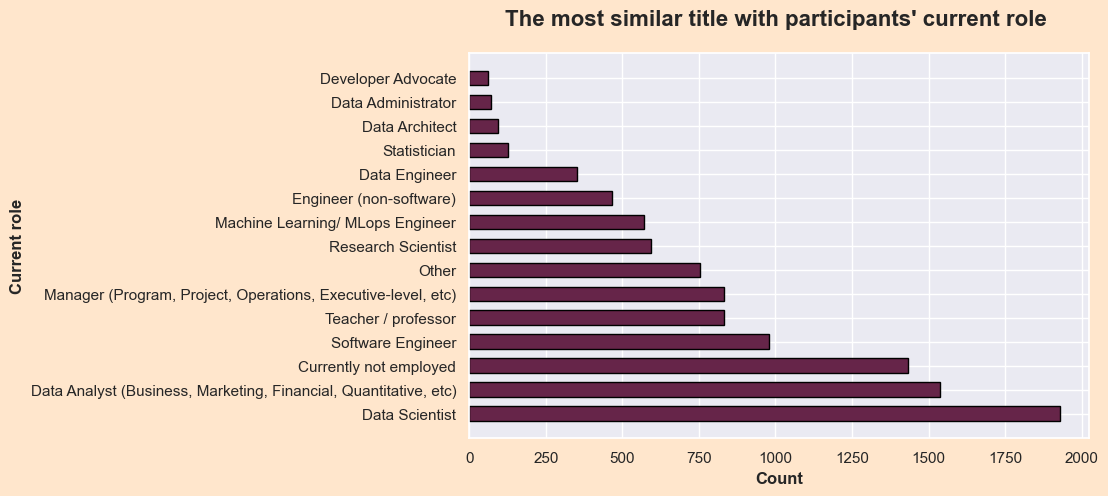

In [53]:
role_df = ds_survey_df['Current role']
count_role_df = role_df.value_counts()

count_role_df.sort_values(ascending=False, inplace= True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_role_df.keys(), count_role_df, edgecolor = 'black', color = '#662549', height = 0.6)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Current role', fontweight = 'bold')
plt.title('The most similar title with participants\' current role ', fontsize = '16', fontweight = 'bold', pad = '20')


fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

- Most of participants are currently in role as a Data Scienttist or a Data Analyst. This show that most participants are working in the field of data science and data analyst.
- Also, a large number of them are currently not employed. This indicates that they are seeking for a employement opportunities or are in the transitional phase of their careers.
- There also a large number of participants that their job are not directly related to the data job like: Software engineering, Engineer(non-software), and other.

##### - **Current Industry:**

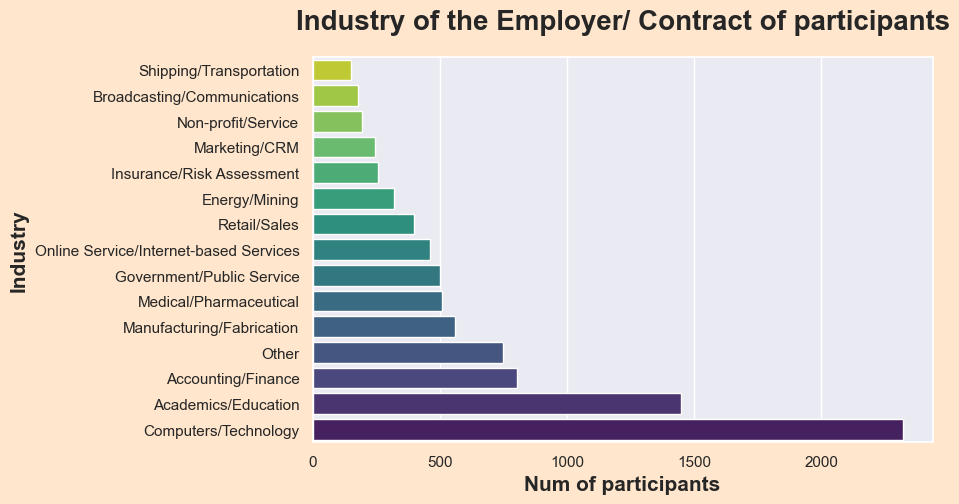

In [128]:
industry_df = ds_survey_df['Current industry']
count_industry_df = industry_df.value_counts()

count_industry_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y=count_industry_df.keys(), x=count_industry_df, palette='viridis_r')

plt.title('Industry of the Employer/ Contract of participants', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Industry', fontsize=15,  fontweight = 'bold')
plt.xlabel('Num of participants', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

- The plot show that participants are working in a wide range of industries. It could be understanded that data-related job have become more necessary in many industry. 
- Also, most of them are working in `Computers/Technology` and in `Academics/ Education`. That fits with the high percent of `Data Scienctist` and `Data Analyst` in the survey.

##### -  **Company size:**

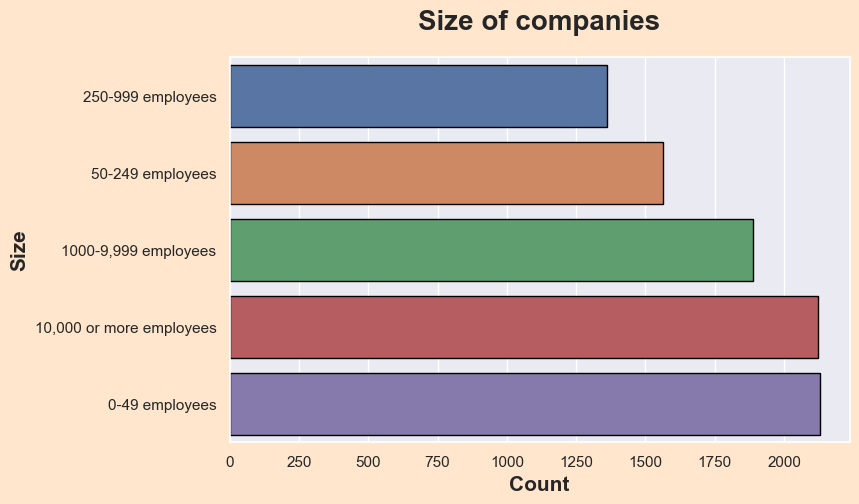

In [130]:
size_df = ds_survey_df['Company size']
count_size_df = size_df.value_counts()

count_size_df.sort_values(ascending = True, inplace = True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_size_df.keys(), x = count_size_df, edgecolor='black')

plt.title('Size of companies', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Size', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()


##### -  **Number of individuals responsible for data workloads at worlplace:**

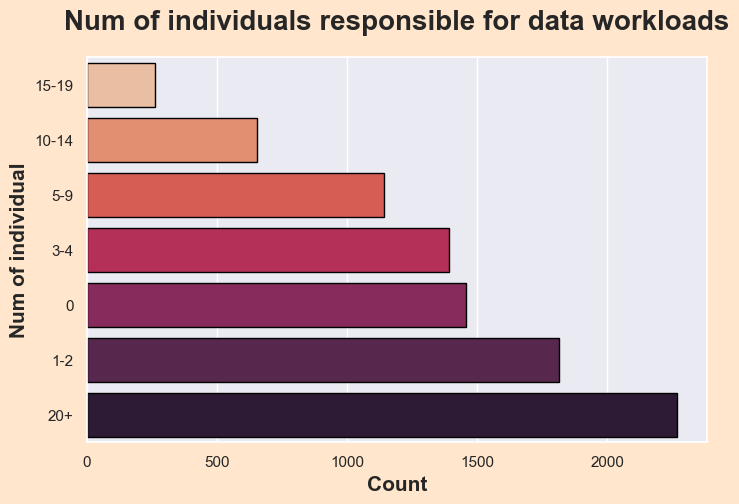

In [131]:
res_df = ds_survey_df['Individual responsibility']
count_res_df = res_df.value_counts()

count_res_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_res_df.keys(), x = count_res_df, palette ='rocket_r', edgecolor='black')

plt.title('Num of individuals responsible for data workloads', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Num of individual', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

- Most of participants are working with more than 20 individuals in their current workplace
- However, participants working in smaller teams, specifically with 1-2 individuals, is also more popular than the other sizes of team.

##### -  **Incorporate Machine Learning methods:**

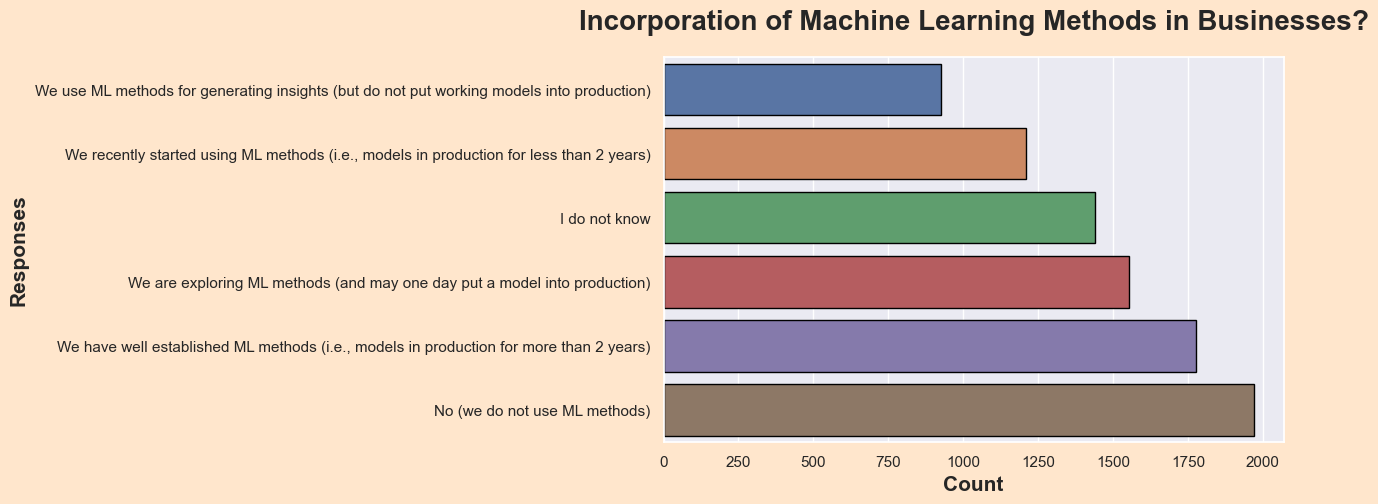

In [132]:
method_df = ds_survey_df['Incorporate ML methods']
count_method_df = method_df.value_counts()

count_method_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_method_df.keys(), x = count_method_df, edgecolor='black')

plt.title('Incorporation of Machine Learning Methods in Businesses?', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Responses', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### - **Current income:**


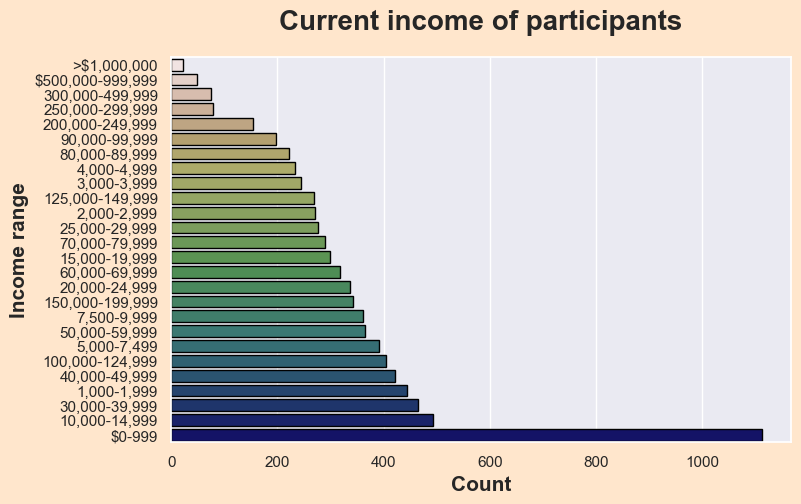

In [139]:
income_df = ds_survey_df['Current income']
count_income_df = income_df.value_counts()

count_income_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_income_df.keys(), x = count_income_df, palette ='gist_earth_r', edgecolor='black')

plt.title('Current income of participants', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Income range', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### -  **Money spend for ML/Cloud:**




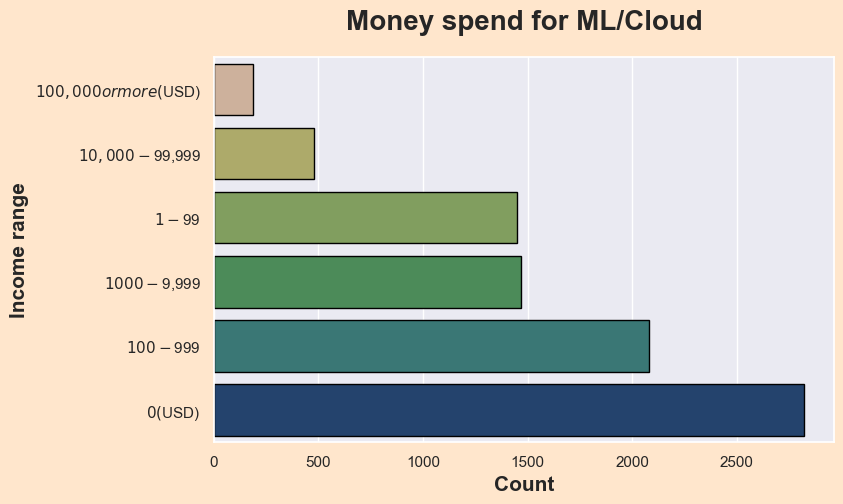

In [19]:
money_spend_df = ds_survey_df['Money spend for ML/Cloud']
count_money_spend_df = money_spend_df.value_counts()

count_money_spend_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_money_spend_df.keys(), x = count_money_spend_df, palette ='gist_earth_r', edgecolor='black')

plt.title('Money spend for ML/Cloud', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Income range', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

#### **B. Multiple choice question**: 

##### **- Data science Platform:**

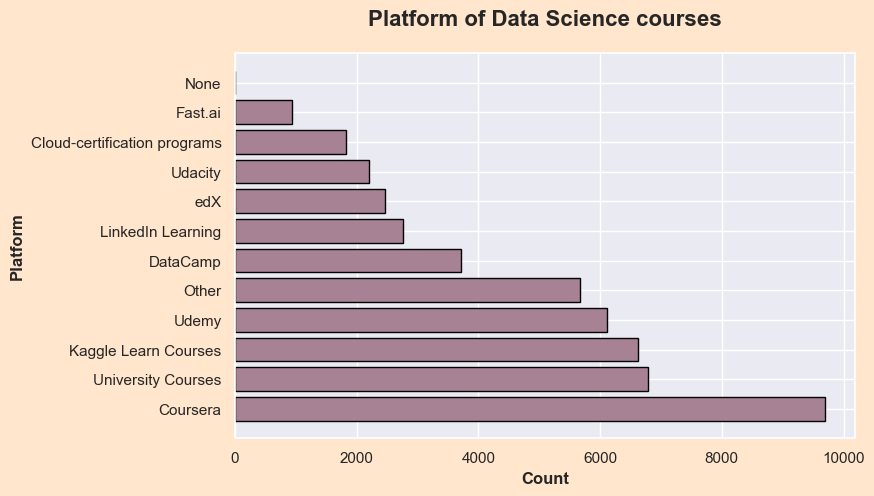

In [142]:

ds_platform_df = ds_survey_df.loc[ : ,'DS Platform (Coursera)' : 'DS Platform (Other)']
ds_platform_count = ds_platform_df.count()
sorted_ds_platform_count = ds_platform_count.sort_values(ascending= False)

platform = sorted_ds_platform_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh( platform[0], sorted_ds_platform_count.values, edgecolor = 'black', color = '#A78295')
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Platform', fontweight = 'bold')
plt.title('Platform of Data Science courses', fontsize = '16', fontweight = 'bold', pad = '20')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()


- `Coursera` is the most popular Data Science learning platform with participants.
- `University courses`, `Kaggle Learn Courses`, `Udemy` is also very popular. 

##### **- Most helpful platform for participants to start studing Data Science:**

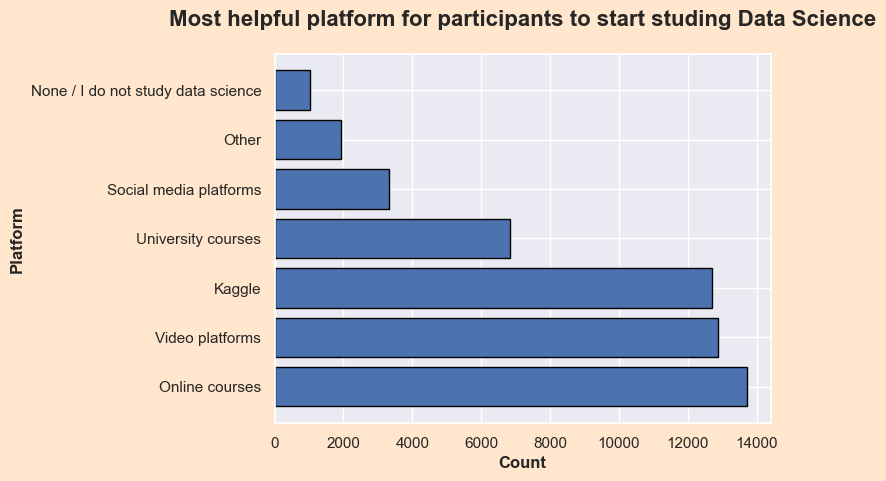

In [21]:
most_helpful_platform_df = ds_survey_df.loc[:,'Most helpful Platform (University courses)':'Most helpful Platform (Other)']

df_count = most_helpful_platform_df.count()

sorted_count = df_count.sort_values(ascending= False)
platform = sorted_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots()
ax = ax.barh(platform[0], sorted_count.values, edgecolor = 'black')
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Platform', fontweight = 'bold')
plt.title('Most helpful platform for participants to start studing Data Science', fontsize = '16', fontweight = 'bold', pad = '20')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

We can see that participants tend to pursue Data Science through online courses or video platforms rather than traditional University courses, so the conclusion here is that the accessibility and the conenience offerd by online resources are preferred by most of participants

##### **- Use of machine learning in researches?**

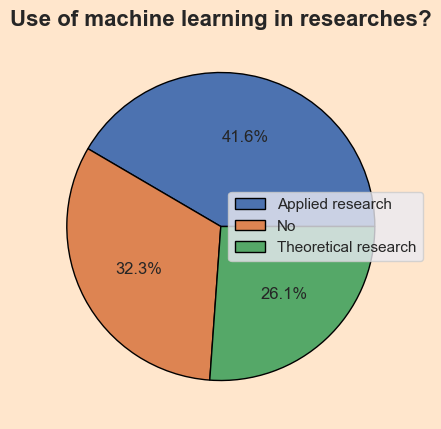

In [121]:
use_ML_df = ds_survey_df.loc[:,'Use ML (Theoretical research)':'Use ML (No)']

use_ML_count = use_ML_df.count()

sorted_count = use_ML_count.sort_values(ascending= False)
sorted_count
answer = sorted_count.keys().str.extract(r'\(([^\)]+)\)')
answer

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.pie(sorted_count,  autopct="%1.1f%%", wedgeprops={'edgecolor': 'black','linewidth': 1})
plt.legend(labels = answer[0], loc='center left', bbox_to_anchor=(0.5, 0.5))
plt.title('Use of machine learning in researches?', fontsize = '16', fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()


##### **- Programming language used on a regular basis**

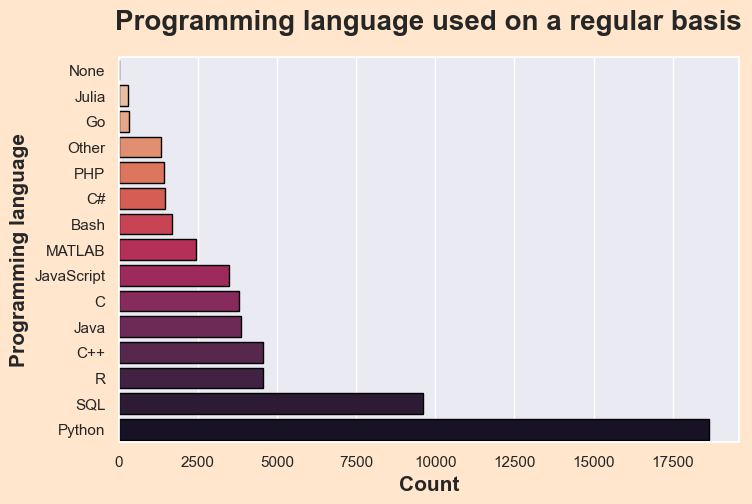

In [23]:
programming_language_df = ds_survey_df.loc[:,'Programming language (Python)':'Programming language (Other)']
programming_language_count = programming_language_df.count()

sorted_count = programming_language_count.sort_values(ascending = True)
languge = sorted_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = languge[0], x = sorted_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Programming language used on a regular basis', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Programming language', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()


##### **- IDE used on a regular basis**

In [157]:

ide_df = ds_survey_df.loc[:,'IDE (JupyterLab)':'IDE (Other)']
ide_count = ide_df.count()
ide = ide_count.keys().str.extract(r'\(([^\)]+)\)')[0]

df = pd.DataFrame({'IDE': ide, 'Count': ide_count.values})

df = df.sort_values('Count', ascending= False)

fig = px.bar(df, x='Count',
              y='IDE', orientation='h', color='Count',
             color_continuous_scale='viridis_r', title='<b>IDE used on a regular basis</b>',
             labels={'Count': '<b>Count</b>', 'IDE': '<b>IDE</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 800,
               height = 500,
            
               margin=dict(l=20, r=30, t=70, b=0),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "     ")
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0)
fig.show(config=dict({'scrollZoom':False}))

##### **- Usage of hosted notebook products**

In [155]:
hosted_nb_product_df = ds_survey_df.loc[:,'Hosted notebook product (Kaggle Notebooks)':'Hosted notebook product (Other)']
hosted_nb_product_count = hosted_nb_product_df.count()
hosted_nb_product = hosted_nb_product_count.keys().str.extract(r'\(([^\)]+)\)')[0]

df = pd.DataFrame({'Products': hosted_nb_product, 'Count': hosted_nb_product_count.values})

df = df.sort_values('Count', ascending= False)

fig = px.bar(df, x='Count',
              y='Products', orientation='h', color='Count',
             color_continuous_scale='viridis_r', title='<b>Usage of hostef notebook products</b>',
             labels={'Count': '<b>Count</b>', 'Procucts': '<b>Hosted notebook products</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 800,
               height = 500,
            
               margin=dict(l=20, r=30, t=70, b=0),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "     ")
               
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0)
fig.show(config=dict({'scrollZoom':False}))

We can see the `Kaggle Notebooks` and `Colab Notebooks` are the most popular products among participants, which have a significant higher usage compare with other products.

#### **- Data visualization libraries used on a regular basis**

In [156]:
visualization_libraries_df = ds_survey_df.loc[:,'Data visualization libraries (Matplotlib)':'Data visualization libraries (Other)']
visualization_libraries_count = visualization_libraries_df.count()
visualization_libraries = visualization_libraries_count.keys().str.extract(r'\(([^\)]+)\)')[0]


df = pd.DataFrame({'Libraries': visualization_libraries, 'Count': visualization_libraries_count.values})

df = df.sort_values('Count', ascending= False)

fig = px.bar(df, x='Count',
              y='Libraries', orientation='h', color='Count',
             color_continuous_scale='tealrose', title='<b>Usage of data visualization libraries on a regular basiss</b>',
             labels={'Count': '<b>Count</b>', 'Procucts': '<b>Data visualization libraries</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 800,
               height = 500,
            
               margin=dict(l=20, r=30, t=70, b=0),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "     ")
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0)
fig.show(config=dict({'scrollZoom':False}))

The most popular data visulization libraries is`Matplotlib`. Other libraries like `Seaborn`, `Plotly`, `Ggplot` is also widly used. 

##### **- Machine learning frameworks used on a regular basis**

In [162]:
ML_frameworks_df = ds_survey_df.loc[:,'ML frameworks (Scikit-learn)':'ML frameworks (Other)']
ML_frameworks_count = ML_frameworks_df.count()
ML_frameworks = ML_frameworks_count.keys().str.extract(r'\(([^\)]+)\)')[0]

df = pd.DataFrame({'Frameworks': ML_frameworks, 'Count': ML_frameworks_count.values})

df = df.sort_values('Count', ascending= False)

fig = px.bar(df, x='Count',
                y='Frameworks', orientation='h', color='Count',
                color_continuous_scale=["#F15A59", "purple", "#19376D"],
                title='<b>Usage of machine learning frameworks on a regular basis</b>',
                labels={'Count': '<b>Count</b>', 'Frameworks': '<b>Machine learning frameworks</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 800,
               height = 500,
            
               margin=dict(l=20, r=30, t=70, b=0),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "     ")
               
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0)
fig.show(config=dict({'scrollZoom':False}))



The most popular Machine Learning frameworks is `Scikit-learn`, because of its advantage in many scenarios. Following closely behind are `TensorFlow`, `Keras`, `Pytorch`, `Xgboost`, are also used widely by participants.


##### **- Machine learning algorithms used on a regular basis**

In [165]:
ML_algorithms_df = ds_survey_df.loc[:,'ML Algorithms (Linear or Logistict Regression)':'ML Algorithms (Other)']
ML_algorithms_count = ML_algorithms_df.count()
ML_algorithms = ML_algorithms_count.keys().str.extract(r'\(([^\)]+)\)')[0]


df = pd.DataFrame({'Algorithms': ML_algorithms, 'Count': ML_algorithms_count.values})

df = df.sort_values('Count', ascending= False)

fig = px.bar(df, x='Count',
                y='Algorithms', orientation='h', color='Count',
                color_continuous_scale=["#9EB8D9", "purple", "#12486B"],
                title='<b>Usage of machine learning algorithms on a regular basis</b>',
                labels={'Count': '<b>Count</b>', 'Algorithms': '<b>Machine learning algorithms</b>'})

fig.update_layout(
               title_font_size = 20,
               width = 800,
               height = 500,
            
               margin=dict(l=20, r=30, t=70, b=0),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "     ")
               
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0)
fig.show(config=dict({'scrollZoom':False}))



##### **- Categories of computer vision methods used on a regular basis**

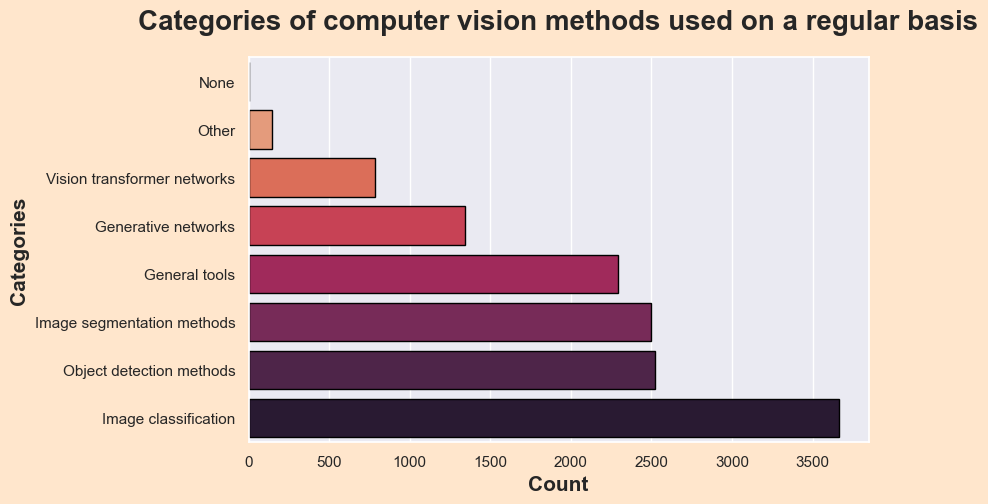

In [29]:
CV_methods_df = ds_survey_df.loc[:,'Computer visions method (General tools)':'Computer visions method (Other)']
CV_methods_count = CV_methods_df.count()

CV_methods_count = CV_methods_count.sort_values(ascending = True)
CV_methods = CV_methods_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = CV_methods[0], x = CV_methods_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Categories of computer vision methods used on a regular basis', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Categories', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Natural language processing (NLP) methods used on a regular basis**

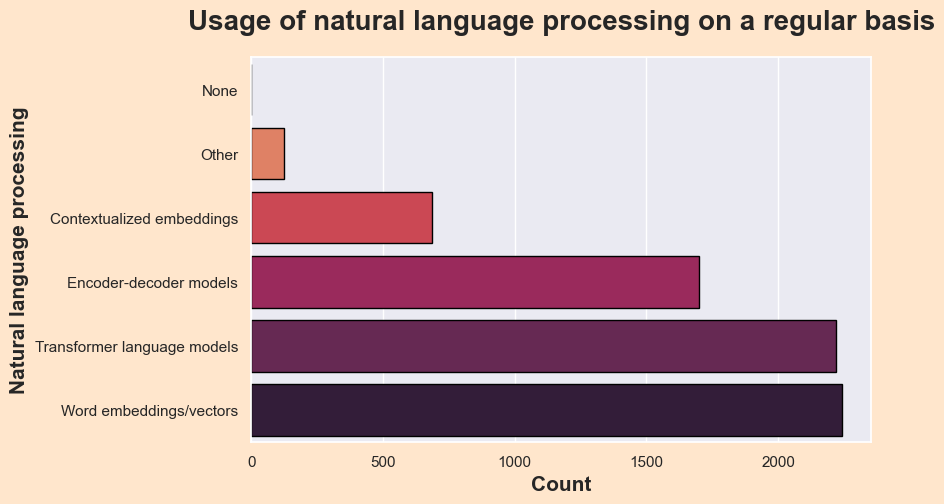

In [30]:
NLP_methods_df = ds_survey_df.loc[:,'NLP methods (Word embeddings/vectors)':'NLP methods (Other)']
NLP_methods_count = NLP_methods_df.count()

NLP_methods_count = NLP_methods_count.sort_values(ascending = True)
NLP_methods = NLP_methods_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = NLP_methods[0], x = NLP_methods_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of natural language processing on a regular basis', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Natural language processing', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Services that pre-trained model weights are downloaded from**

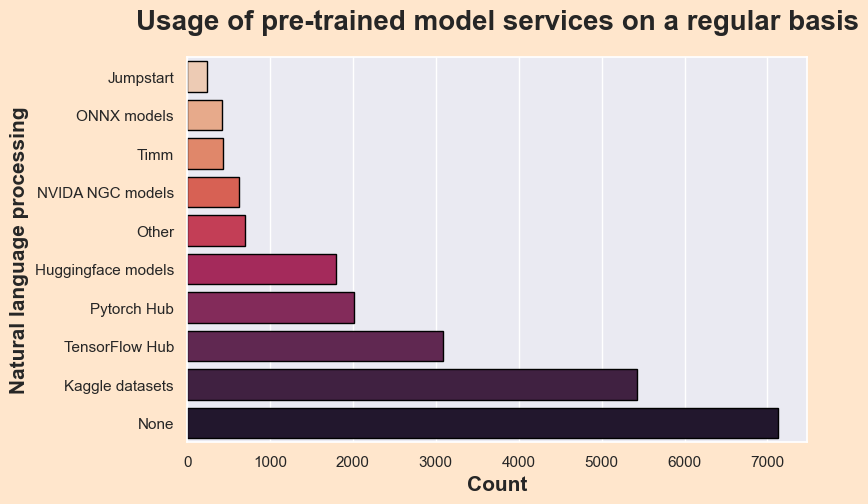

In [31]:
services_df = ds_survey_df.loc[:,'Pretrain model services (TensorFlow Hub)':'Pretrain model services (Other)']
services_count = services_df.count()

services_count = services_count.sort_values(ascending = True)
services = services_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = services[0], x = services_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of pre-trained model services on a regular basis', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Natural language processing', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Activities that make up an important part of particiants' role at work**

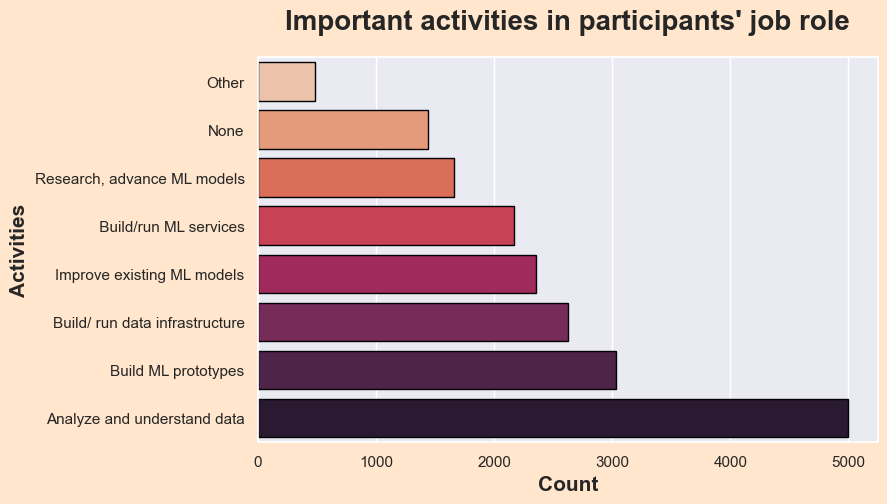

In [32]:
activities_df = ds_survey_df.loc[:,'Important role at work (Analyze and understand data)':'Important role at work (Other)']
activities_count = activities_df.count()

activities_count = activities_count.sort_values(ascending = True)
activities = activities_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = activities[0], x = activities_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Important activities in participants\' job role', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Activities', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Usage of Cloud computing platforms**

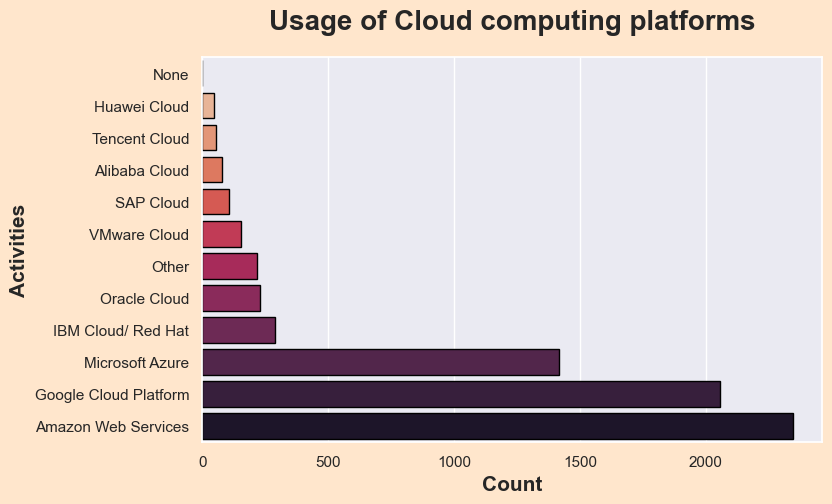

In [33]:
CC_platforms_df = ds_survey_df.loc[:,'Cloud computing Platforms (Amazon Web Services)':'Cloud computing Platforms (Other)']
CC_platforms_count = CC_platforms_df.count()

CC_platforms_count = CC_platforms_count.sort_values(ascending = True)
CC_platforms = CC_platforms_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = CC_platforms[0], x = CC_platforms_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of Cloud computing platforms', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Activities', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Usage of Cloud computing products**

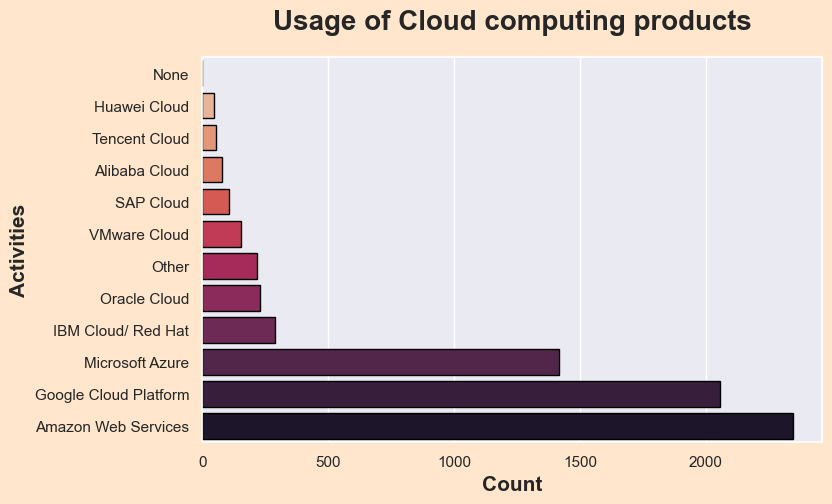

In [34]:
CC_products_df = ds_survey_df.loc[:,'Cloud Computing products use (Amazon Elastic Compute Coud)':'Cloud Computing products use (Other)']
CC_products_count = CC_products_df.count()

CC_products_count = CC_products_count.sort_values(ascending = True)
CC_products = CC_products_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = CC_platforms[0], x = CC_platforms_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of Cloud computing products', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Prodcuts', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Usage of data storage products**

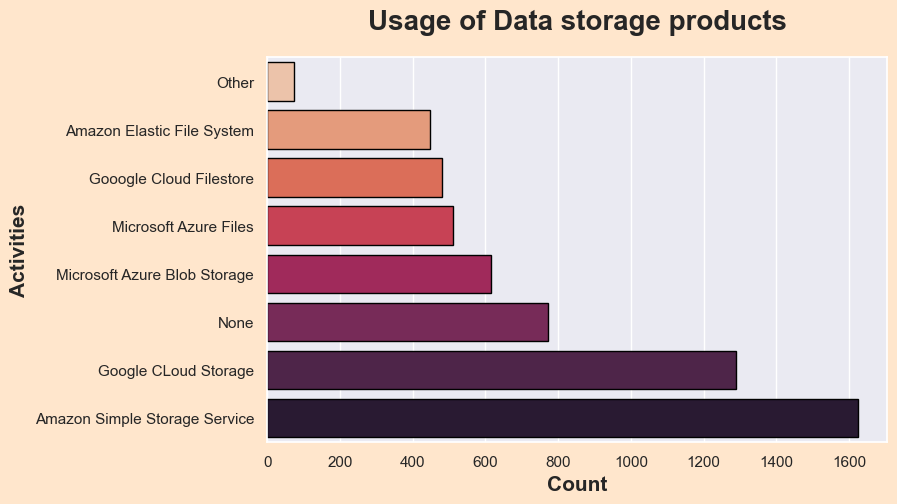

In [35]:
storage_products_df = ds_survey_df.loc[:,'Data storage products (Microsoft Azure Blob Storage)':'Data storage products (Other)']
storage_products_count = storage_products_df.count()

storage_products_count = storage_products_count.sort_values(ascending = True)
storage_products = storage_products_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = storage_products[0], x = storage_products_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of Data storage products', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Products', fontsize=15,  fontweight = 'bold')
plt.xlabel('Num of user', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Usage of data products (relational databases, data warehouses, data lakes, or similar)**

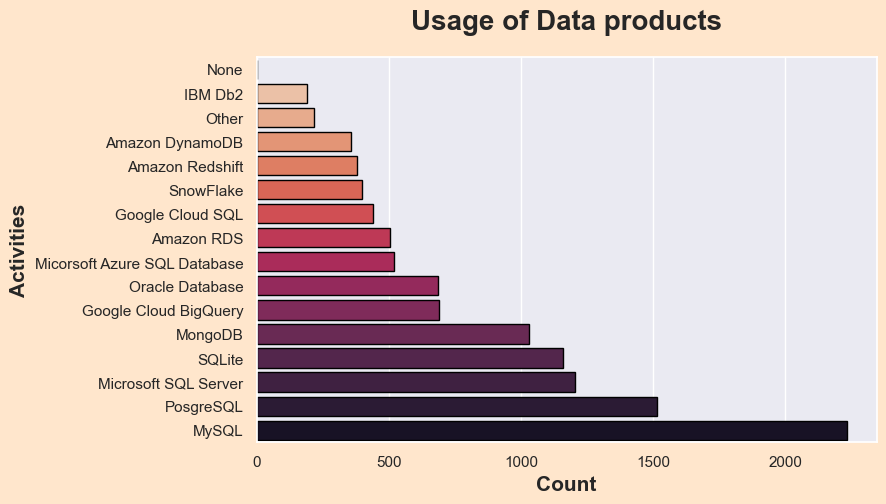

In [36]:
data_products_df = ds_survey_df.loc[:,'Data products (MySQL)':'Data products (Other)']
data_products_count = data_products_df.count()

data_products_count = data_products_count.sort_values(ascending = True)
data_products = data_products_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = data_products[0], x = data_products_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of Data products', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Products', fontsize=15,  fontweight = 'bold')
plt.xlabel('Num of users', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Usage of business intelligence tools**

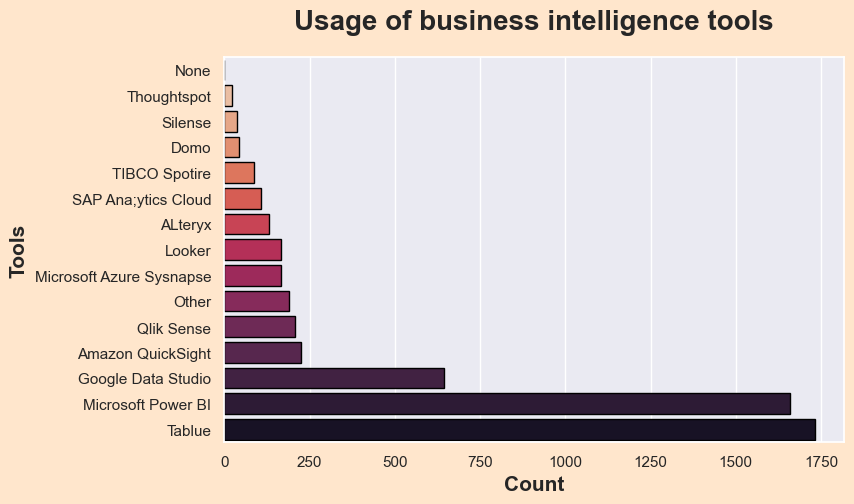

In [37]:
BI_tools_df = ds_survey_df.loc[:,'Business Intelligent tools (Amazon QuickSight)':'Business Intelligent tools (Other)']
BI_tools_count = BI_tools_df.count()

BI_tools_count = BI_tools_count.sort_values(ascending = True)
BI_tools = BI_tools_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = BI_tools[0], x = BI_tools_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of business intelligence tools', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Tools', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Managed machine learning products used on a regular basis**

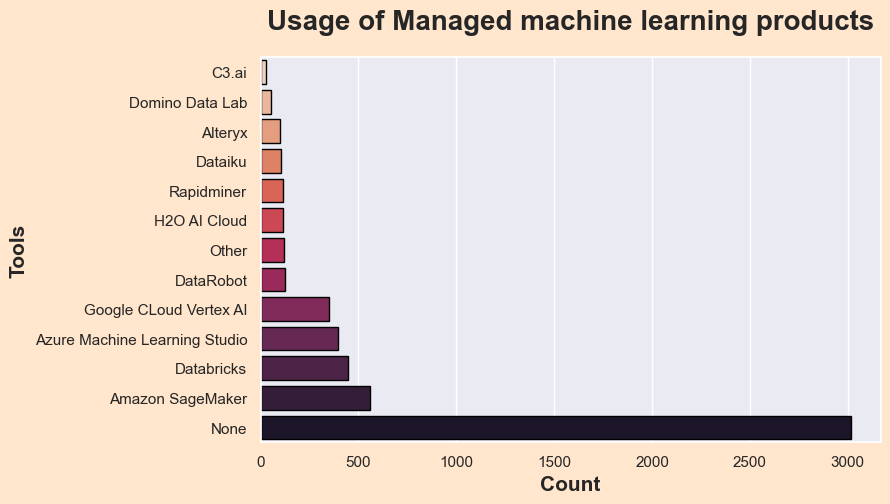

In [38]:
ML_products_df = ds_survey_df.loc[:,'ML products (Amazon SageMaker)':'ML products (Other)']
ML_products_count = ML_products_df.count()

ML_products_count = ML_products_count.sort_values(ascending = True)
ML_products = ML_products_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = ML_products[0], x = ML_products_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of Managed machine learning products', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Products', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

We found that the ML management tools are not widely used by participants.

##### **- Usage of automated machine learning tools**

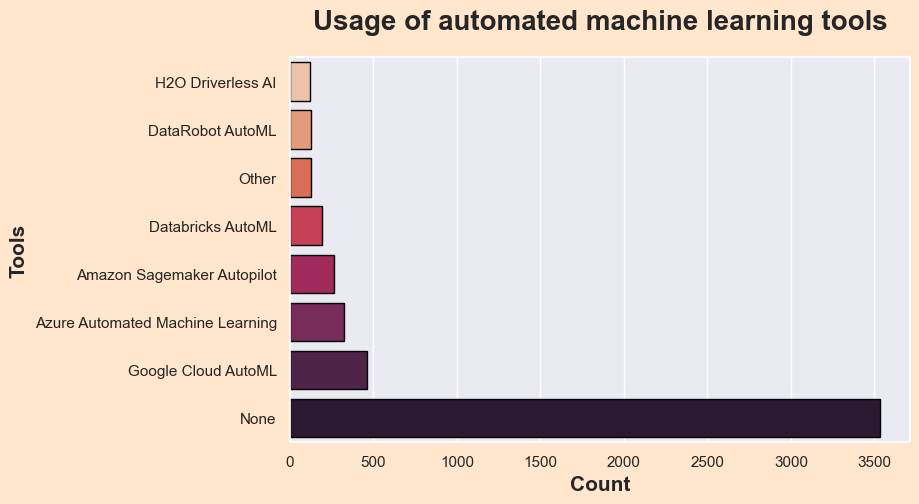

In [39]:
auto_ML_tools_df = ds_survey_df.loc[:,'Automated ML tools (Google Cloud AutoML)':'Automated ML tools (Other)']
auto_ML_tools_count = auto_ML_tools_df.count()

auto_ML_tools_count = auto_ML_tools_count.sort_values(ascending = True)
auto_ML_tools = auto_ML_tools_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = auto_ML_tools[0], x = auto_ML_tools_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Usage of automated machine learning tools', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Tools', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Products to serve machine learning models**

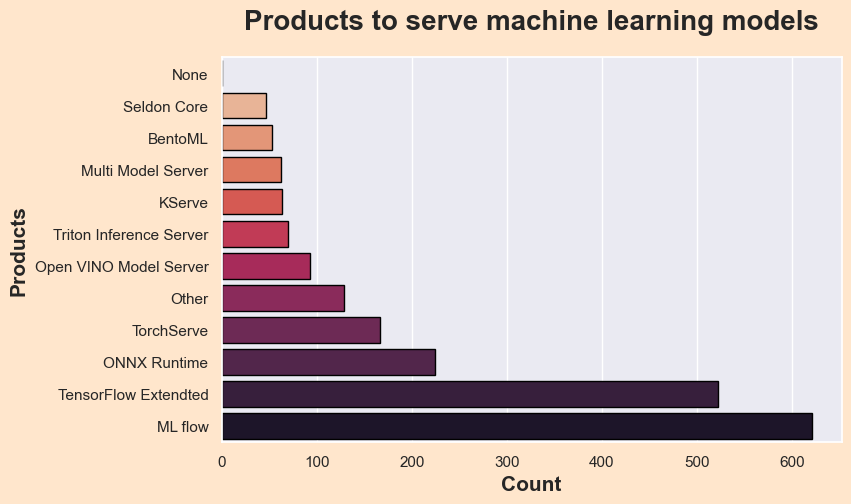

In [40]:
ML_products_df = ds_survey_df.loc[:,'ML products use (TensorFlow Extendted)':'ML products use (Other)']
ML_products_count = ML_products_df.count()

ML_products_count = ML_products_count.sort_values(ascending = True)
ML_products = ML_products_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = ML_products[0], x = ML_products_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Products to serve machine learning models', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Products', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Tools to monitor machine learning models**

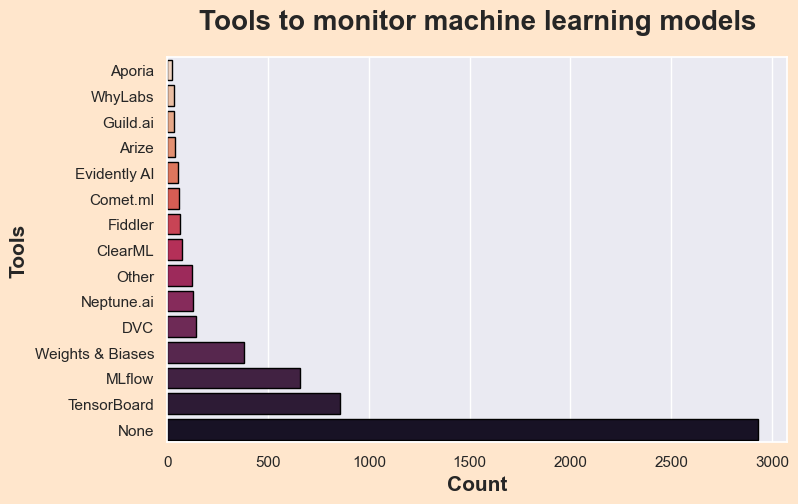

In [41]:
monitor_tools_df = ds_survey_df.loc[:,'ML monitors (Neptune.ai)':'ML monitors (Other)']
monitor_tools_count = monitor_tools_df.count()

monitor_tools_count = monitor_tools_count.sort_values(ascending = True)
monitor_tools = monitor_tools_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = monitor_tools[0], x = monitor_tools_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Tools to monitor machine learning models', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Tools', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Responsible or ethical AI products in machine learning practices**

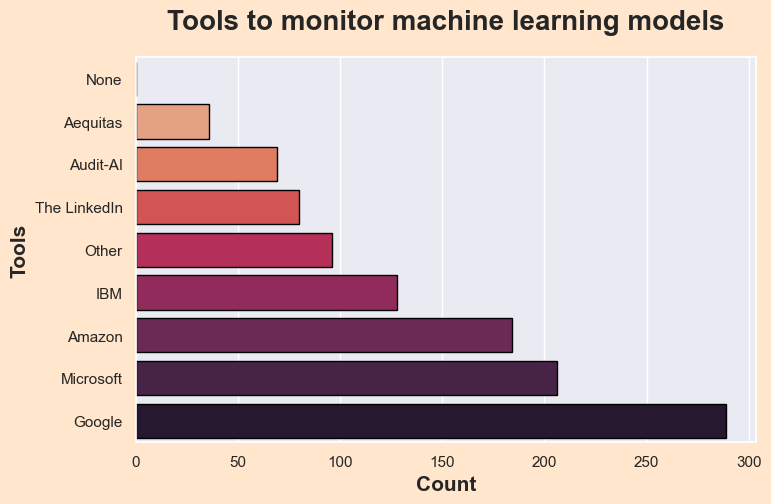

In [42]:
AI_products_df = ds_survey_df.loc[:,'AI products (Google)':'AI products (Other)']
AI_products_count = AI_products_df.count()

AI_products_count = AI_products_count.sort_values(ascending = True)
AI_products = AI_products_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = AI_products[0], x = AI_products_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Tools to monitor machine learning models', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Tools', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Types of specialized hardware when training machine learning models**

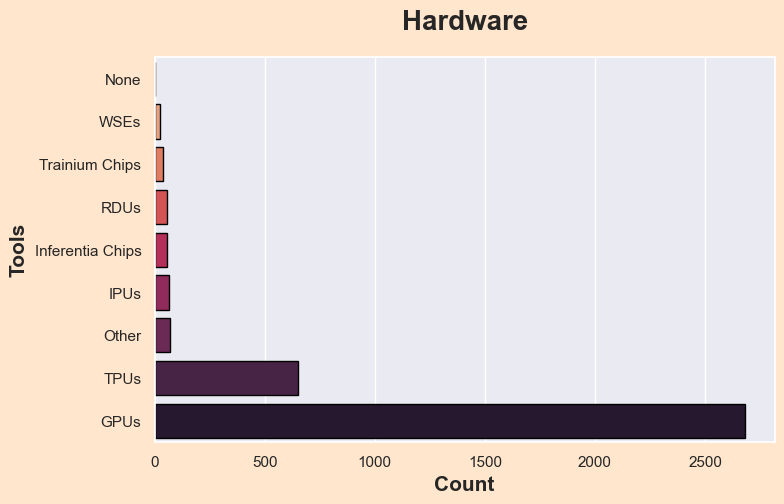

In [43]:
hardwares_df = ds_survey_df.loc[:,'Hardware use (GPUs)':'Hardware use (Other)']
hardwares_count = hardwares_df.count()

hardwares_count = hardwares_count.sort_values(ascending = True)
hardwares = hardwares_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = hardwares[0], x = hardwares_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Hardware for training ML models', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Hardware', fontsize=15,  fontweight = 'bold')
plt.xlabel('Num of user', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### **- Favorite media sources that report on data science topics**

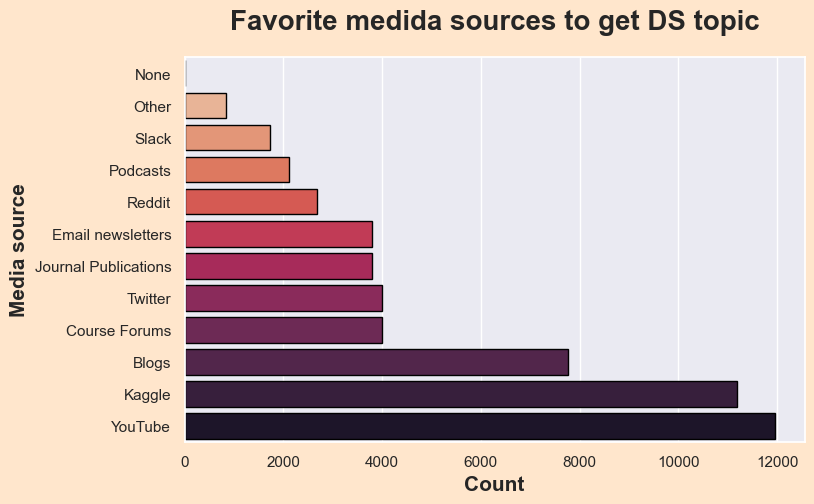

In [80]:
sources_df = ds_survey_df.loc[:,'Favorite media sources (Twitter)':'Favorite media sources (Other)']
sources_count = sources_df.count()

sources_count = sources_count.sort_values(ascending = True)
sources = sources_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = sources[0], x = sources_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Favorite medida sources to get DS topic', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Media source', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

`YouTube`, `Kaggle`, `Blogs` are the most common source that we can get a Data science topic.